In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("gender_submission.csv")

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
data = train.append(test)
data.reset_index(inplace=True, drop=True)
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


# EDA

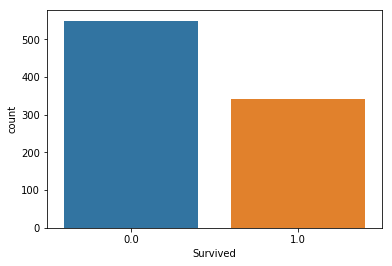

In [14]:
sns.countplot(data['Survived'])

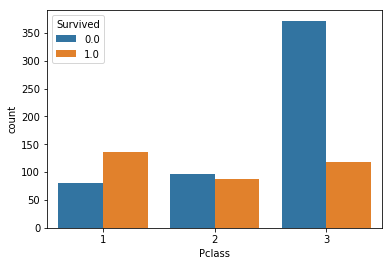

In [15]:
sns.countplot(data['Pclass'], hue=data['Survived'])

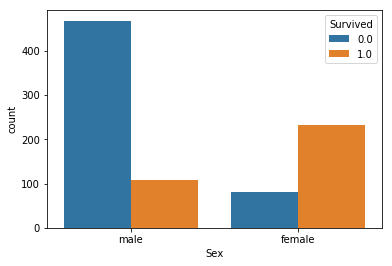

In [19]:
sns.countplot(data['Sex'], hue=data['Survived'])

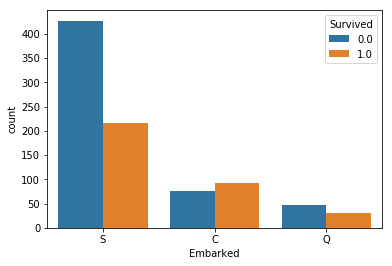

In [17]:
sns.countplot(data['Embarked'], hue=data['Survived'])

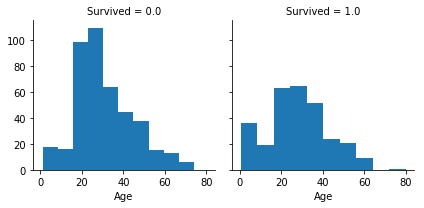

In [24]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age')

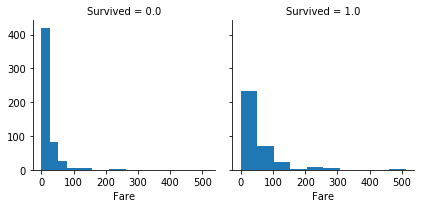

In [25]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Fare')

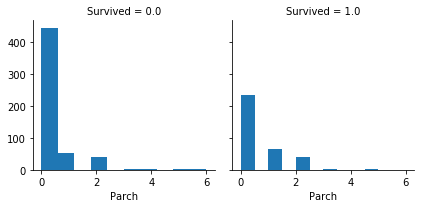

In [26]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Parch')

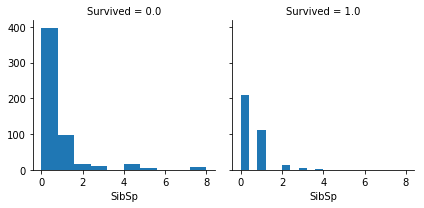

In [27]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'SibSp')

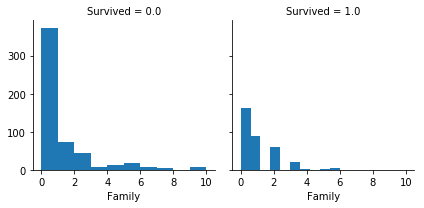

In [69]:
data['Family'] = data['Parch'] + data['SibSp']
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Family')

# Feature engineering

In [33]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [30]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]

In [31]:
data['Title1'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title1, dtype: object

In [34]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]

In [35]:
data['Title1'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title1, dtype: object

In [36]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

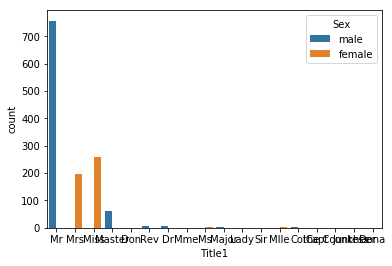

In [39]:
sns.countplot(data['Title1'], hue=data['Sex'])

In [40]:
pd.crosstab(data['Title1'],data['Sex'])

Sex,female,male
Title1,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [41]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [42]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [43]:
data.groupby(['Title2'])['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [67]:
data.loc[(data['Title2'] == 'Mr') & (data['Sex'] == 'female')]['Sex']
data.iloc[796, 8] = 'male'
pd.crosstab(data['Title2'],data['Sex'])

Sex,female,male
Title2,,
Master,0,61
Miss,264,0
Mr,0,783
Mrs,201,0


In [71]:
data['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
5                   330877
6                    17463
7                   349909
8                   347742
9                   237736
10                 PP 9549
11                  113783
12               A/5. 2151
13                  347082
14                  350406
15                  248706
16                  382652
17                  244373
18                  345763
19                    2649
20                  239865
21                  248698
22                  330923
23                  113788
24                  349909
25                  347077
26                    2631
27                   19950
28                  330959
29                  349216
               ...        
1279                364858
1280                349909
1281                 12749
1282              PC 17592
1283             C.A. 2673
1284            C.A. 30769
1

In [121]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [122]:
data['Ticket_info'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket_info, dtype: object

In [123]:
data['Ticket_info2'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if x.isdigit() else 0)

In [124]:
data['Ticket_info2'].head()

0         0
1         0
2         0
3    113803
4    373450
Name: Ticket_info2, dtype: object

In [125]:
data['Ticket_info2'] = data['Ticket_info2'].apply(str)
data['Ticket_info2'] = data['Ticket_info2'].apply(lambda x: x[0])
data['Ticket_info2'].head()

0    0
1    0
2    0
3    1
4    3
Name: Ticket_info2, dtype: object

In [126]:
data['Ticket_info'] = data['Ticket_info'] + data['Ticket_info2']
data['Ticket_info'].head()

0        A50
1        PC0
2    STONO20
3         X1
4         X3
Name: Ticket_info, dtype: object

In [127]:
data['Ticket_info'].unique()

array(['A50', 'PC0', 'STONO20', 'X1', 'X3', 'X2', 'PP0', 'CA0', 'X7',
       'SCParis0', 'SCA40', 'A40', 'SP0', 'SOC0', 'WC0', 'SOTONOQ0',
       'WEP0', 'X4', 'STONO0', 'C0', 'SCPARIS0', 'SOP0', 'Fa0', 'LINE0',
       'FCC0', 'SWPP0', 'SCOW0', 'X9', 'PPP0', 'SC0', 'SCAH0', 'X6',
       'AS0', 'X5', 'SOPP0', 'X8', 'FC0', 'SOTONO20', 'CASOTON0', 'SCA30',
       'STONOQ0', 'AQ40', 'A0', 'LP0', 'AQ30'], dtype=object)

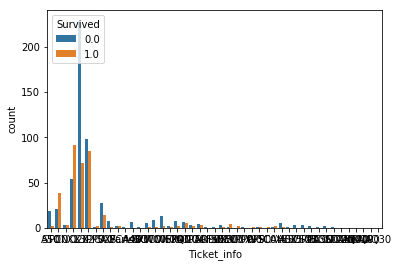

In [128]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])

In [134]:
data['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [138]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'N')
data["Cabin"].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [139]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

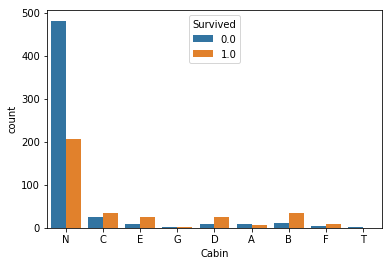

In [140]:
sns.countplot(data['Cabin'], hue=data['Survived'])

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Age             1046 non-null float64
Cabin           1309 non-null object
Embarked        1307 non-null object
Fare            1309 non-null float64
Name            1309 non-null object
Parch           1309 non-null int64
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
SibSp           1309 non-null int64
Survived        891 non-null float64
Ticket          1309 non-null object
Family          1309 non-null int64
Title1          1309 non-null object
Title2          1309 non-null object
Ticket_info     1309 non-null object
Ticket_info2    1309 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 173.9+ KB


In [142]:
data['Embarked'] = data['Embarked'].fillna('S')

In [170]:
data['FamilySize'] = data['SibSp'] + data['Parch']

In [150]:
avg = data['Age'].mean()
std = data['Age'].std()
null_count = data['Age'].isnull().sum()
null_random_list = np.random.randint(avg - std, avg + std, size=null_count)
data['Age'][np.isnan(data['Age'])] = null_random_list
data['Age'] = data['Age'].astype(int)

1309

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age               1309 non-null int64
Cabin             1309 non-null object
Embarked          1309 non-null object
Fare              1309 non-null float64
Name              1309 non-null object
Parch             1309 non-null int64
PassengerId       1309 non-null int64
Pclass            1309 non-null int64
Sex               1309 non-null object
SibSp             1309 non-null int64
Survived          891 non-null float64
Ticket            1309 non-null object
Family            1309 non-null int64
Title1            1309 non-null object
Title2            1309 non-null object
Ticket_info       1309 non-null object
Ticket_info2      1309 non-null object
CategoricalAge    1309 non-null category
dtypes: category(1), float64(2), int64(6), object(9)
memory usage: 175.3+ KB


In [155]:
data.loc[data['Age'] <= 16, 'Age']= 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[data['Age'] > 64, 'Age'] = 4 ;

In [156]:
data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)

In [159]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family', 'Title1',
       'Title2', 'Ticket_info', 'Ticket_info2', 'CategoricalAge'],
      dtype='object')

In [172]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes
data['Age'] = data['Age'].astype('category').cat.codes
data['Fare'] = data['Fare'].astype('category').cat.codes
data['FamilySize'] = data['FamilySize'].astype('category').cat.codes

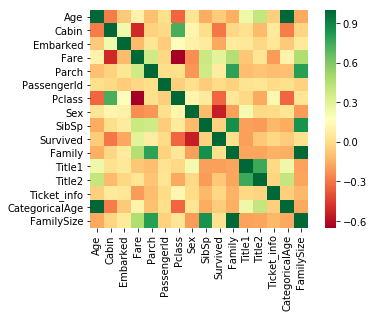

In [173]:
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')

In [179]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [180]:
dataTest.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family,Title1,Title2,Ticket_info,Ticket_info2,CategoricalAge,FamilySize
891,2,7,1,0,"Kelly, Mr. James",0,892,2,1,0,NaN,330911,0,12,2,38,3,2,0
892,2,7,2,0,"Wilkes, Mrs. James (Ellen Needs)",0,893,2,0,1,NaN,363272,1,13,3,38,3,2,1
893,3,7,1,1,"Myles, Mr. Thomas Francis",0,894,1,1,0,NaN,240276,0,12,2,37,2,3,0
894,1,7,2,1,"Wirz, Mr. Albert",0,895,2,1,0,NaN,315154,0,12,2,38,3,1,0
895,1,7,2,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,2,0,1,NaN,3101298,2,13,3,38,3,1,2


In [177]:
ReadyTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'FamilySize', 'Title2','Ticket_info','Cabin']]
ReadyTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'FamilySize', 'Title2','Ticket_info','Cabin']]

In [178]:
ReadyTrain.head()

,Survived,Age,Embarked,Fare,Pclass,Sex,FamilySize,Title2,Ticket_info,Cabin
0,0.0,1,2,0,2,1,1,2,2,7
1,1.0,2,0,3,0,0,1,3,14,2
2,1.0,1,2,1,2,0,0,1,31,7
3,1.0,2,2,3,0,0,1,3,36,2
4,0.0,2,2,1,2,1,0,2,38,7


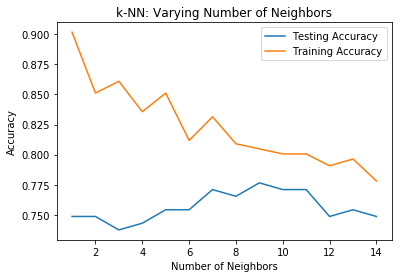

In [191]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 


neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

y = ReadyTrain['Survived'].values
X = ReadyTrain.drop('Survived', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


for i, k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [207]:
X_new = ReadyTest
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X, y)

knn_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.

In [201]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier( n_estimators=3000,
                             bootstrap=True,
                             oob_score=True,
                             random_state=None,
                             n_jobs=-1) 

rf.fit(ReadyTrain.iloc[:, 1:], ReadyTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8058


In [196]:
pd.concat((pd.DataFrame(ReadyTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.301627
6,Title2,0.178905
3,Pclass,0.102886
7,Ticket_info,0.097173
5,FamilySize,0.088423
8,Cabin,0.085028
2,Fare,0.063710
0,Age,0.050433
1,Embarked,0.031814


In [204]:
rf_prediction =  rf.predict(ReadyTest)
print("Prediction: {}".format(rf_prediction))

Prediction: [0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.

In [208]:
submit['Survived'] = knn_prediction
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit3.csv', index= False)